<a href="https://colab.research.google.com/github/williamlidberg/Penetration/blob/main/soil_bearing_capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cone penetration



The data can be pulled from Williams github:

In [ ]:
%ls
!git clone https://github.com/williamlidberg/Penetration
%cd /content/Penetration/
!ls

sample_data/
Cloning into 'Penetration'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.
/content/Penetration
coloramp.csv			   Penetration_transects_william.prj
LICENSE				   Penetration_transects_william.shp
Penetration_transects_william.CPG  Penetration_transects_william.shp.xml
Penetration_transects_william.csv  Penetration_transects_william.shx
Penetration_transects_william.dbf  README.md


Penetration_transects_william.csv contains the transects and extracted values from the SLU Soilmoisture maps. Start by reading and inspecting the data.

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 39.7 MB/s 


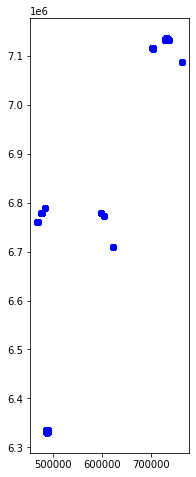

In [ ]:
!pip install geopandas
import geopandas as gpd 
shapefile = gpd.read_file('/content/Penetration/Penetration_transects_william.shp')
shapefile.plot(figsize=(8,8), color = 'blue')

In [ ]:
import pandas as pd
penetrationdata = pd.read_csv ('/content/Penetration/Penetration_transects_william.csv',sep=';')
penetrationdata.head()

,Name,Northing,Easting,Elevation,Waypoint,soil_moist,Average_so,F5cm,F10cm,F15cm,Soil_class,O_horizon,Kpa5,Kpa10,Kpa15,Prob,Classified
0,1610,6.331031e+06,485406.80102,271.45832,1610,100.0,20.0,26,37,38,5,0.0,72.768395,97.863837,137.928490,86,2
1,1611,6.331028e+06,485418.20319,252.01908,1611,100.0,50.0,18,35,46,5,0.0,100.280435,102.835124,115.830719,84,2
2,1612,6.331025e+06,485422.97994,257.49936,1612,100.0,40.0,31,34,38,5,0.0,62.784186,105.540090,137.928490,89,2
3,1613,6.331015e+06,485424.36589,256.21902,1613,100.0,40.0,32,37,40,5,0.0,61.161753,97.863837,131.575381,91,2
4,1614,6.331013e+06,485423.67411,251.32518,1614,100.0,40.0,27,33,43,5,0.0,70.475725,108.408992,123.153817,91,2


In [ ]:
print(len(penetrationdata))

1063


## Explonation of headers

*   Name = Plot ID
*   Northing = Y coordinate in Swereff 99 TM
*   Easting = X coordinate in Swereff 99 TM
*   Elevation = Elevation from GPS unit. Not very accurate
*   Waypoint = Same as plot ID
*   Soil_moist = Messured soil moisture. Not accurate
*   Average_so = Average penetration
*   F5cm = Penetration depth after 5 bonks
*   F10cm = Penetration depth after 10 bonks
*   F15 = Penetration depth after 15 bonks
*   Soil_class = Soil moisture classified in the field based on vegetation patterns. 1: Dry, 2: Mesic, 3:Mesic-Moist, 4: Moist, 5: Wet
*   O_horison = Messured O horizon in cm
*   Kpa5 = Cone Penetration index based on 5 bonks
*   Kpa10 = Cone penetration index after 10 bonks
*   Kpa15 = Cone penetration index after 15 bonks
*   Prob = Probability from SLU Soil moisture map. 0 % is dry and 100 % is wet. 
*   Classified = Values extracted from the classified version of the SLU Soil moisture map.

Kpa5, Kpa10 and Kpa15 are the most relevant data collected in the field. These are what we want to investigate.
















In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.scatter(penetrationdata, x="Prob", y='Kpa15', color="Classified",color_continuous_scale=px.colors.sequential.Viridis_r)
fig.show()

There seem to be two outliers with penetration index above 4000. Lets remove those and look again

In [ ]:
import plotly.express as px
subsett_data=penetrationdata.loc[penetrationdata['Kpa15'] < 4000]
fig = px.scatter(subsett_data, x="Prob", y='Kpa15', color="Classified",color_continuous_scale=px.colors.sequential.Viridis_r)
fig.show()

A bit messy between mesic and moist but most wet plots have low bearing capacity. Lets try a box plot as well.

In [ ]:
import plotly.express as px
df = subsett_data
fig2 = px.box(subsett_data, x='Classified', y='Kpa15', color = 'Classified')
fig2.show()
# 1 = Dry
# 2 = Mesic-Moist
# 3 = Wet

Lets look into the distributions within each class on the soil moisture map.

In [ ]:
import plotly.figure_factory as ff
import numpy as np

Classes = subsett_data[['Classified','Kpa15']]
#Classes
dry = df[subsett_data['Classified']==1]
mesic = df[subsett_data['Classified']==2]
wet = df[subsett_data['Classified']==3]
#dry.head()
drypen = dry['Kpa15'] 
mesicpen = mesic['Kpa15']
wetpen = wet['Kpa15']

group_labels = ['Dry', 'Mesic', 'Wet']
hist_data = [drypen, mesicpen, wetpen]
colors = ['orange', 'green', 'blue']
# Create distplot with custom bin_size
fighist = ff.create_distplot(hist_data, group_labels, bin_size=.2,show_hist=False,colors=colors)
fighist.show()

Contact: william.lidberg@slu.se